In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
sb.set() # set the default Seaborn style for graphics
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [2]:
rookiedata = pd.read_csv('rookie_data.csv')
rookiedata.head()

index           Name  Hall of Fame Class  Year Drafted    GP   MIN   PTS  \
0      0    Jeff Taylor                 NaN        1982.0  44.0  17.6   3.6   
1      1  Charles Smith                 NaN        1988.0  71.0  30.4  16.3   
2      2     Mark Davis                 NaN        1988.0  33.0   7.8   3.8   
3      3  Charles Smith                 NaN        1989.0  60.0   8.7   2.9   
4      4  Michael Smith                 NaN        1989.0  65.0   9.5   5.0   

   FGM   FGA   FG%  ...  FTA   FT% OREB  DREB  REB  AST  STL  BLK  TOV   EFF  
0  1.5   3.6  40.0  ...  1.0  65.2  0.6   1.2  1.8  2.5  0.9  0.3  1.4   5.2  
1  6.1  12.4  49.5  ...  5.5  72.5  2.4   4.1  6.5  1.5  1.0  1.3  2.1  16.7  
2  1.5   3.1  48.0  ...  1.0  82.4  0.5   0.6  1.1  0.4  0.4  0.1  0.4   3.8  
3  1.0   2.2  44.4  ...  1.3  69.7  0.2   0.9  1.2  1.7  0.6  0.1  0.6   4.1  
4  2.1   4.4  47.6  ...  1.0  82.8  0.6   0.9  1.5  1.2  0.1  0.0  0.8   4.6  

[5 rows x 24 columns]

In [3]:
rookiedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2013 entries, 0 to 2012
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               2013 non-null   int64  
 1   Name                1537 non-null   object 
 2   Hall of Fame Class  26 non-null     float64
 3   Year Drafted        1537 non-null   float64
 4   GP                  1537 non-null   float64
 5   MIN                 1537 non-null   float64
 6   PTS                 1537 non-null   float64
 7   FGM                 1537 non-null   float64
 8   FGA                 1537 non-null   float64
 9   FG%                 1537 non-null   float64
 10  3P Made             1537 non-null   float64
 11  3PA                 1537 non-null   float64
 12  3P%                 1537 non-null   object 
 13  FTM                 1537 non-null   float64
 14  FTA                 1537 non-null   float64
 15  FT%                 1537 non-null   float64
 16  OREB  

We will first clean the data by removing the empty rows

In [4]:
rookiedata.dropna(subset=['Name'], inplace=True)

In [5]:
# Change the year drafted to type int64
rookiedata['Year Drafted'] = rookiedata['Year Drafted'].astype('int')
rookiedata.loc[rookiedata['3P%'] == '-', '3P%'] = 0
rookiedata['3P%'] = rookiedata['3P%'].astype('float64')

We will change the Hall of Fame class to indicate "1" if the player has made it into the hall of fame, and "0" if the player did not make it into the hall of fame.

In [6]:
# Making Hall of Fame  as True and False.
rookiedata.loc[rookiedata['Hall of Fame Class'].isnull() == False, 'Hall of Fame Class'] = 1
rookiedata.loc[rookiedata['Hall of Fame Class'].isnull() == True, 'Hall of Fame Class'] = 0
rookiedata['Hall of Fame Class'] = rookiedata['Hall of Fame Class'].astype('int')
rookiedata.rename(columns={"Hall of Fame Class": "Hall of Fame"}, inplace=True)

Now we will remove all duplicated names to effectively merge the two datasets using the names as the unique key.

In [7]:
rookiedata.drop_duplicates(subset=["Name"], keep=False, inplace=True, ignore_index=True)
rookiedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1526 entries, 0 to 1525
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         1526 non-null   int64  
 1   Name          1526 non-null   object 
 2   Hall of Fame  1526 non-null   int64  
 3   Year Drafted  1526 non-null   int64  
 4   GP            1526 non-null   float64
 5   MIN           1526 non-null   float64
 6   PTS           1526 non-null   float64
 7   FGM           1526 non-null   float64
 8   FGA           1526 non-null   float64
 9   FG%           1526 non-null   float64
 10  3P Made       1526 non-null   float64
 11  3PA           1526 non-null   float64
 12  3P%           1526 non-null   float64
 13  FTM           1526 non-null   float64
 14  FTA           1526 non-null   float64
 15  FT%           1526 non-null   float64
 16  OREB          1526 non-null   float64
 17  DREB          1526 non-null   float64
 18  REB           1526 non-null 

In [8]:
rookiedata

index               Name  Hall of Fame  Year Drafted    GP   MIN   PTS  \
0        11       Andrew Toney             0          1980  75.0  23.6  12.9   
1        12       Bill Hanzlik             0          1980  74.0  17.0   5.4   
2        13      Bill Laimbeer             0          1980  81.0  30.4   9.8   
3        14         Billy Reid             0          1980  59.0  10.1   3.2   
4        15       Butch Carter             0          1980  54.0  12.4   5.6   
...     ...                ...           ...           ...   ...   ...   ...   
1521   1532     Taurean Prince             0          2016  20.0  10.0   3.4   
1522   1533   Tomas Satoransky             0          2016  23.0  14.7   3.1   
1523   1534      Troy Williams             0          2016  24.0  17.4   5.3   
1524   1535    Wade Baldwin IV             0          2016  22.0  13.5   3.5   
1525   1536  Willy Hernangomez             0          2016  28.0  13.6   5.5   

      FGM   FGA   FG%  ...  FTA   FT%  OREB  DREB  REB  AST  STL  BLK  TOV  \
0     5.3  10.7  49.5  ...  3.0  71.2   0.4   1.5  1.9  3.6  0.8  0.1  2.9   
1     1.9   3.9  47.8  ...  2.0  79.3   0.9   1.2  2.1  1.5  0.8  0.3  1.1   
2     4.2   8.3  50.3  ...  1.9  76.5   3.3   5.3  8.6  2.7  0.7  1.0  1.6   
3     1.4   3.1  45.4  ...  0.7  56.4   0.5   0.6  1.0  1.2  0.6  0.1  1.3   
4     2.1   4.6  46.2  ...  1.8  73.7   0.6   0.6  1.2  1.0  0.4  0.0  0.9   
...   ...   ...   ...  ...  ...   ...   ...   ...  ...  ...  ...  ...  ...   
1521  1.2   3.1  39.3  ...  0.7  85.7   0.2   1.8  2.0  0.7  0.3  0.3  0.7   
1522  1.3   3.2  39.7  ...  0.7  64.7   0.4   1.1  1.5  2.2  0.5  0.0  0.9   
1523  2.1   5.1  41.8  ...  1.0  60.0   0.3   1.6  1.8  0.8  1.0  0.4  1.1   
1524  1.2   3.8  31.3  ...  1.3  82.1   0.3   1.1  1.5  2.1  0.6  0.3  1.3   
1525  2.3   4.1  56.0  ...  1.1  71.9   1.5   3.2  4.7  0.8  0.3  0.5  1.2   

       EFF  
0     10.2  
1      6.4  
2     16.5  
3      2.8  
4      4.3  
...    ...  
1521   4.0  
1522   4.2  
1523   4.8  
1524   3.8  
1525   8.5  

[1526 rows x 24 columns]

## Combining the two datasets

Since only retired players can be elected to be in the NBA hall of fame, we need to add in the year retired for each of the rookies in the dataset.

In [9]:
playerdata = pd.read_csv('player_data.csv')
playerdata.head()

name  year_start  year_end position height  weight  \
0       Alaa Abdelnaby        1991      1995      F-C   6-10   240.0   
1      Zaid Abdul-Aziz        1969      1978      C-F    6-9   235.0   
2  Kareem Abdul-Jabbar        1970      1989        C    7-2   225.0   
3   Mahmoud Abdul-Rauf        1991      2001        G    6-1   162.0   
4    Tariq Abdul-Wahad        1998      2003        F    6-6   223.0   

         birth_date                                college  
0     June 24, 1968                        Duke University  
1     April 7, 1946                  Iowa State University  
2    April 16, 1947  University of California, Los Angeles  
3     March 9, 1969             Louisiana State University  
4  November 3, 1974              San Jose State University

In [10]:
# Create a new dataframe with name and year_end
df0 = playerdata[["name", "year_end"]].copy()
# Change the column names
df0.rename(columns={"name": "Name", "year_end": "Retired"}, inplace=True)
# Remove null values
df0.dropna(subset=['Name'], inplace=True)
# Remove duplicates
df0.drop_duplicates(subset=["Name"], keep=False, inplace=True)

Since we are only interested in whether or not the player is retired, we can modify the "Retired" column to indicate True if the player is retired and False if the player is not retired.

In [11]:
df0.loc[df0['Retired'] == 2018, 'Retired'] = 0
df0.loc[df0['Retired'] != 0, 'Retired'] = 1
df0['Retired'] = df0['Retired'].astype('int')

In [12]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4453 entries, 0 to 4549
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     4453 non-null   object
 1   Retired  4453 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 104.4+ KB


In [13]:
rookiedata = rookiedata.merge(df0, left_on=["Name"], right_on=["Name"])
rookiedata

index               Name  Hall of Fame  Year Drafted    GP   MIN   PTS  \
0        11       Andrew Toney             0          1980  75.0  23.6  12.9   
1        12       Bill Hanzlik             0          1980  74.0  17.0   5.4   
2        13      Bill Laimbeer             0          1980  81.0  30.4   9.8   
3        14         Billy Reid             0          1980  59.0  10.1   3.2   
4        15       Butch Carter             0          1980  54.0  12.4   5.6   
...     ...                ...           ...           ...   ...   ...   ...   
1457   1529    Rodney McGruder             0          2016  30.0  25.7   5.8   
1458   1530     Semaj Christon             0          2016  33.0  15.6   3.0   
1459   1533   Tomas Satoransky             0          2016  23.0  14.7   3.1   
1460   1534      Troy Williams             0          2016  24.0  17.4   5.3   
1461   1536  Willy Hernangomez             0          2016  28.0  13.6   5.5   

      FGM   FGA   FG%  ...   FT%  OREB  DREB  REB  AST  STL  BLK  TOV   EFF  \
0     5.3  10.7  49.5  ...  71.2   0.4   1.5  1.9  3.6  0.8  0.1  2.9  10.2   
1     1.9   3.9  47.8  ...  79.3   0.9   1.2  2.1  1.5  0.8  0.3  1.1   6.4   
2     4.2   8.3  50.3  ...  76.5   3.3   5.3  8.6  2.7  0.7  1.0  1.6  16.5   
3     1.4   3.1  45.4  ...  56.4   0.5   0.6  1.0  1.2  0.6  0.1  1.3   2.8   
4     2.1   4.6  46.2  ...  73.7   0.6   0.6  1.2  1.0  0.4  0.0  0.9   4.3   
...   ...   ...   ...  ...   ...   ...   ...  ...  ...  ...  ...  ...   ...   
1457  2.1   5.3  40.0  ...  72.4   1.5   2.0  3.5  1.5  0.7  0.3  0.7   7.5   
1458  1.3   4.0  31.8  ...  52.9   0.4   1.0  1.4  2.5  0.4  0.1  0.7   3.7   
1459  1.3   3.2  39.7  ...  64.7   0.4   1.1  1.5  2.2  0.5  0.0  0.9   4.2   
1460  2.1   5.1  41.8  ...  60.0   0.3   1.6  1.8  0.8  1.0  0.4  1.1   4.8   
1461  2.3   4.1  56.0  ...  71.9   1.5   3.2  4.7  0.8  0.3  0.5  1.2   8.5   

      Retired  
0           1  
1           1  
2           1  
3           1  
4           1  
...       ...  
1457        1  
1458        1  
1459        0  
1460        0  
1461        0  

[1462 rows x 25 columns]

## Let's do some data visualization to know our data better

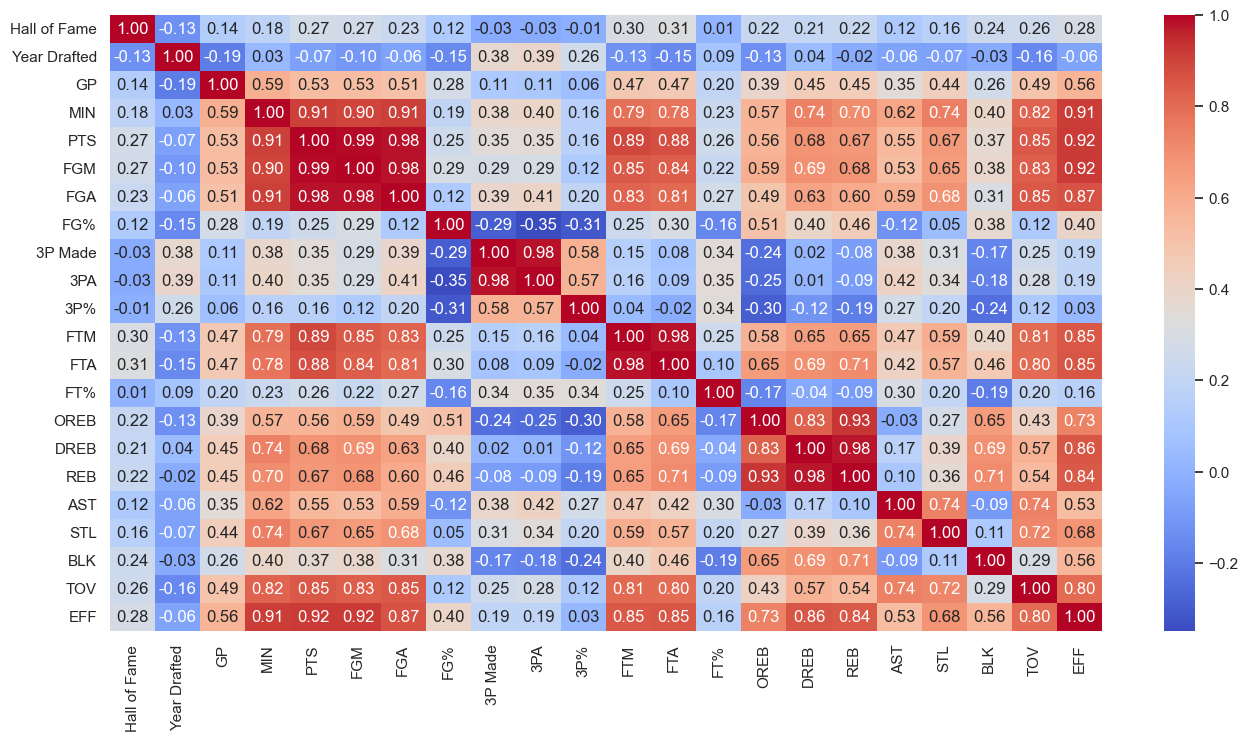

In [14]:
# Select variables of interest
nba_vars = rookiedata.loc[:, 'Name':'EFF']

# Compute the correlation matrix
corr = nba_vars.corr()

# Create a heatmap with the correlation matrix
fig, ax = plt.subplots(figsize=(16, 8))
sb.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f', ax=ax)

# Show the plot
plt.show()

In [15]:
# Select variables of interest
nba_vars = rookiedata.loc[:, 'Name':'EFF']

# Compute the correlation matrix
corr = nba_vars.corr()

# Get the top 5 highest correlations with the 'HOF' variable
top_corr = corr['Hall of Fame'].sort_values(ascending=False)[1:6]

# Print the results
print(top_corr)

FTA    0.314928
FTM    0.301131
EFF    0.284246
PTS    0.271857
FGM    0.265879
Name: Hall of Fame, dtype: float64


In [16]:
# Filter the data to select only hall of fame players
hof_players = rookiedata[rookiedata['Hall of Fame'] == 1]

# Print the list of hall of fame players
hof_players

index               Name  Hall of Fame  Year Drafted    GP   MIN   PTS  \
21      34       Kevin McHale             1          1980  82.0  20.1  10.0   
58      74       Isiah Thomas             1          1981  72.0  33.8  17.0   
92     111  Dominique Wilkins             1          1982  82.0  32.9  17.5   
95     115       James Worthy             1          1982  77.0  25.6  13.4   
124    147      Clyde Drexler             1          1983  82.0  17.2   7.7   
145    168      Ralph Sampson             1          1983  82.0  32.8  21.0   
162    185    Charles Barkley             1          1984  82.0  28.6  14.0   
169    194    Hakeem Olajuwon             1          1984  82.0  35.5  20.6   
174    199      John Stockton             1          1984  82.0  18.2   5.6   
181    208     Michael Jordan             1          1984  82.0  38.3  28.2   
210    237       Chris Mullin             1          1985  55.0  25.3  14.0   
219    246         Joe Dumars             1          1985  82.0  23.9   9.4   
223    250        Karl Malone             1          1985  81.0  30.6  14.9   
250    280      Dennis Rodman             1          1986  77.0  15.0   6.5   
301    333      Reggie Miller             1          1987  82.0  22.4  10.0   
303    336     Scottie Pippen             1          1987  79.0  20.9   7.9   
337    370     Mitch Richmond             1          1988  79.0  34.4  22.0   
362    396     David Robinson             1          1989  82.0  36.6  24.3   
456    493    Dikembe Mutombo             1          1991  71.0  38.3  16.6   
491    530    Alonzo Mourning             1          1992  78.0  33.9  21.0   
525    566   Shaquille O'Neal             1          1992  81.0  37.9  23.4   
616    658    Arvydas Sabonis             1          1995  73.0  23.8  14.5   
652    694      Allen Iverson             1          1996  76.0  40.1  23.5   
901    949           Yao Ming             1          2002  82.0  29.0  13.5   

      FGM   FGA   FG%  ...   FT%  OREB  DREB   REB  AST  STL  BLK  TOV   EFF  \
21    4.3   8.1  53.3  ...  67.9   1.9   2.5   4.4  0.7  0.3  1.8  1.3  11.4   
58    6.3  14.8  42.4  ...  70.4   0.8   2.1   2.9  7.8  2.1  0.2  4.2  15.6   
92    7.3  14.9  49.3  ...  68.2   2.8   3.1   5.8  1.6  1.0  0.8  2.2  15.6   
95    5.8  10.0  57.9  ...  62.4   2.0   3.1   5.2  1.7  1.2  0.8  2.3  14.7   
124   3.1   6.8  45.1  ...  72.8   1.4   1.5   2.9  1.9  1.3  0.3  1.5   8.2   
145   8.7  16.7  52.3  ...  66.1   3.6   7.6  11.1  2.0  0.8  2.4  3.6  24.0   
162   5.2   9.5  54.5  ...  73.3   3.2   5.3   8.6  1.9  1.2  1.0  2.5  18.4   
169   8.3  15.3  53.8  ...  61.3   5.4   6.5  11.9  1.4  1.2  2.7  2.9  25.2   
174   1.9   4.1  47.1  ...  73.6   0.3   1.0   1.3  5.1  1.3  0.1  1.8   8.8   
181  10.2  19.8  51.5  ...  84.5   2.0   4.5   6.5  5.9  2.4  0.8  3.5  29.2   
210   5.2  11.3  46.3  ...  89.6   0.8   1.3   2.1  1.9  1.3  0.4  1.4  11.8   
219   3.5   7.3  48.1  ...  79.8   0.7   0.7   1.5  4.8  0.8  0.1  1.9  10.2   
223   6.2  12.5  49.6  ...  48.1   2.1   6.7   8.9  2.9  1.3  0.5  3.4  16.1   
250   2.8   5.1  54.5  ...  58.7   2.1   2.2   4.3  0.7  0.5  0.6  1.2   8.5   
301   3.7   7.6  48.8  ...  80.1   1.2   1.2   2.3  1.6  0.7  0.2  1.2   9.2   
303   3.3   7.1  46.3  ...  57.6   1.5   2.3   3.8  2.1  1.1  0.7  1.7   9.2   
337   8.2  17.5  46.8  ...  81.0   2.0   3.9   5.9  4.2  1.0  0.2  3.4  19.4   
362   8.4  15.9  53.1  ...  73.2   3.7   8.3  12.0  2.0  1.7  3.9  3.1  30.6   
456   6.0  12.2  49.3  ...  64.2   4.5   7.8  12.3  2.2  0.6  3.0  3.5  22.3   
491   7.3  14.3  51.1  ...  78.1   3.4   6.9  10.3  1.0  0.3  3.5  3.0  24.3   
525   9.0  16.1  56.2  ...  59.2   4.2   9.6  13.9  1.9  0.7  3.5  3.8  28.9   
616   5.4   9.9  54.5  ...  75.7   2.0   6.0   8.1  1.8  0.9  1.1  2.1  18.6   
652   8.2  19.8  41.6  ...  70.2   1.5   2.6   4.1  7.5  2.1  0.3  4.4  19.3   
901   4.9   9.8  49.8  ...  81.1   2.4   5.8   8.2  1.7  0.4  1.8  2.1  17.6   

     Retired  
21         1 

## As we can see, a total of 23 players from 1461 players got into Hall of Fame. Let's do some data visualization based on these 23 outstanding players.

In [17]:
import random

# function to generate random colors
def random_colors(number_of_colors):
    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                 for i in range(number_of_colors)]
    return color

# sort the DataFrame by PTS in descending order and select top 25 rows
sorted_players = hof_players.sort_values('PTS', ascending=False).head(25)

# calculate the average PTS for players not in HoF
avg_pts = rookiedata[~rookiedata['Name'].isin(hof_players['Name'])]['PTS'].mean()

# create trace for HoF players
trace0 = go.Bar(
    x=sorted_players['Name'].head(25),
    y=sorted_players['PTS'].head(25),
    marker=dict(
        color= random_colors(25),
    ),
    opacity=0.6,
    name='HoF Players'
)

# create trace for other players
trace1 = go.Bar(
    x=['Other non-HoF Players'],
    y=[avg_pts],
    marker=dict(
        color= 'grey',
    ),
    opacity=0.6,
    name='Other non-HoF Players'
)

# combine the traces into a data list
data = [trace0, trace1]

# create the layout
layout = go.Layout(
    title={
        'text': 'HoF players with their points per game',
        'x': 0.5,
        'y': 0.9,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

f = plt.figure(figsize=(16, 8))

# create the figure and display it
fig = go.Figure(data=data, layout=layout)
fig.show()

<Figure size 1600x800 with 0 Axes>

In [18]:
# sort the DataFrame by PTS in descending order and select top 25 rows
sorted_players = hof_players.sort_values('AST', ascending=False).head(25)

# calculate the average PTS for players not in HoF
avg_pts = rookiedata[~rookiedata['Name'].isin(hof_players['Name'])]['AST'].mean()

# create trace for HoF players
trace0 = go.Bar(
    x=sorted_players['Name'].head(25),
    y=sorted_players['AST'].head(25),
    marker=dict(
        color= random_colors(25),
    ),
    opacity=0.6,
    name='HoF Players'
)

# create trace for other players
trace1 = go.Bar(
    x=['Other non-HoF Players'],
    y=[avg_pts],
    marker=dict(
        color= 'grey',
    ),
    opacity=0.6,
    name='Other non-HoF Players'
)

# combine the traces into a data list
data = [trace0, trace1]

# create the layout
layout = go.Layout(
    title={
        'text': 'HoF players with their assists per game',
        'x': 0.5,
        'y': 0.9,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

f = plt.figure(figsize=(16, 8))

# create the figure and display it
fig = go.Figure(data=data, layout=layout)
fig.show()

In [19]:
# sort the DataFrame by PTS in descending order and select top 25 rows
sorted_players = hof_players.sort_values('FG%', ascending=False).head(25)

# calculate the average PTS for players not in HoF
avg_pts = rookiedata[~rookiedata['Name'].isin(hof_players['Name'])]['FG%'].mean()

# create trace for HoF players
trace0 = go.Bar(
    x=sorted_players['Name'].head(25),
    y=sorted_players['FG%'].head(25),
    marker=dict(
        color= random_colors(25),
    ),
    opacity=0.6,
    name='HoF Players'
)

# create trace for other players
trace1 = go.Bar(
    x=['Other non-HoF Players'],
    y=[avg_pts],
    marker=dict(
        color= 'grey',
    ),
    opacity=0.6,
    name='Other non-HoF Players'
)

# combine the traces into a data list
data = [trace0, trace1]

# create the layout
layout = go.Layout(
    title={
        'text': 'HoF players with their FG%',
        'x': 0.5,
        'y': 0.9,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

f = plt.figure(figsize=(16, 8))

# create the figure and display it
fig = go.Figure(data=data, layout=layout)
fig.show()

### As we can see, generally, HoF players have higher PTS, FG%, Assits per game, than the non-HoF players.

In [20]:
# create subplots with 2 rows and 2 columns
fig = make_subplots(rows=2, cols=2, 
                    subplot_titles=['EFF vs PTS', 'MIN vs PTS', 'GP vs PTS', 'FG% vs PTS'], 
                    specs=[[{'rowspan': 1, 'colspan': 1}, {'rowspan': 1, 'colspan': 1}], 
                           [{'rowspan': 1, 'colspan': 1}, {'rowspan': 1, 'colspan': 1}]], 
                    horizontal_spacing=0.2, vertical_spacing=0.2)

# define colors for each player
colors = px.colors.qualitative.Alphabet[:len(hof_players)]

# loop through the players and add each scatter plot to a subplot
for i, player in enumerate(hof_players['Name']):
    fig.add_trace(
        go.Scatter(x=hof_players[hof_players['Name']==player]['PTS'],
                   y=hof_players[hof_players['Name']==player]['EFF'],
                   mode='markers',
                   name=player,
                   marker=dict(color=colors[i])
        ),
        row=1, col=1
    )
    fig.add_trace(
        go.Scatter(x=hof_players[hof_players['Name']==player]['PTS'],
                   y=hof_players[hof_players['Name']==player]['MIN'],
                   mode='markers',
                   name=player,
                   marker=dict(color=colors[i])
        ),
        row=1, col=2
    )
    fig.add_trace(
        go.Scatter(x=hof_players[hof_players['Name']==player]['PTS'],
                   y=hof_players[hof_players['Name']==player]['GP'],
                   mode='markers',
                   name=player,
                   marker=dict(color=colors[i])
        ),
        row=2, col=1
    )
    fig.add_trace(
        go.Scatter(x=hof_players[hof_players['Name']==player]['PTS'],
                   y=hof_players[hof_players['Name']==player]['FG%'],
                   mode='markers',
                   name=player,
                   marker=dict(color=colors[i])
        ),
        row=2, col=2
    )

# update subplot layout and axis titles
fig.update_layout(title='Data Visualization on HoF players')
fig.update_xaxes(title_text='PTS')
fig.update_yaxes(title_text='EFF', row=1, col=1)
fig.update_yaxes(title_text='MIN', row=1, col=2)
fig.update_yaxes(title_text='GP', row=2, col=1)
fig.update_yaxes(title_text='FG%', row=2, col=2)

# show the plot
fig.show()

### As we can see, green colour dot : Michael Jordan is always on the top right, indicating he is one of the top performing players among the Hall of Fame. The left bottom grey colour dot, deem as one of the lowest performing players, John Stockton, can be viewed as the margin line to enter the Hall of Fame. Other rookie players are expected to perform better than the margin line in order to enter Hall of Fame

## Splitting the data

We will now split the data into two: retired and non-retired players, because only retired players can make it into the hall of fame. We will subsequently use the model to determine if these non-retired players will make it into the hall of fame based on their rookie statistics.

In [21]:
rookiedata_retired = rookiedata.drop(rookiedata[rookiedata['Retired'] == 0].index)
rookiedata_active = rookiedata.drop(rookiedata[rookiedata['Retired'] == 1].index)

In [22]:
rookiedata_retired.reset_index(drop=True, inplace=True)
rookiedata_retired.drop(columns="Name", inplace=True)
rookiedata_retired

index  Hall of Fame  Year Drafted    GP   MIN   PTS  FGM   FGA   FG%  \
0        11             0          1980  75.0  23.6  12.9  5.3  10.7  49.5   
1        12             0          1980  74.0  17.0   5.4  1.9   3.9  47.8   
2        13             0          1980  81.0  30.4   9.8  4.2   8.3  50.3   
3        14             0          1980  59.0  10.1   3.2  1.4   3.1  45.4   
4        15             0          1980  54.0  12.4   5.6  2.1   4.6  46.2   
...     ...           ...           ...   ...   ...   ...  ...   ...   ...   
1186   1468             0          2015  57.0  12.2   5.0  2.0   4.9  41.0   
1187   1486             0          2015  35.0  11.3   2.4  0.8   2.3  35.0   
1188   1488             0          2015  53.0  16.4   4.5  1.8   4.3  42.2   
1189   1529             0          2016  30.0  25.7   5.8  2.1   5.3  40.0   
1190   1530             0          2016  33.0  15.6   3.0  1.3   4.0  31.8   

      3P Made  ...   FT%  OREB  DREB  REB  AST  STL  BLK  TOV   EFF  Retired  
0         0.1  ...  71.2   0.4   1.5  1.9  3.6  0.8  0.1  2.9  10.2        1  
1         0.0  ...  79.3   0.9   1.2  2.1  1.5  0.8  0.3  1.1   6.4        1  
2         0.0  ...  76.5   3.3   5.3  8.6  2.7  0.7  1.0  1.6  16.5        1  
3         0.0  ...  56.4   0.5   0.6  1.0  1.2  0.6  0.1  1.3   2.8        1  
4         0.1  ...  73.7   0.6   0.6  1.2  1.0  0.4  0.0  0.9   4.3        1  
...       ...  ...   ...   ...   ...  ...  ...  ...  ...  ...   ...      ...  
1186      0.6  ...  79.2   0.2   1.3  1.5  1.9  0.6  0.1  0.8   5.4        1  
1187      0.3  ...  72.7   0.1   1.3  1.4  1.1  0.3  0.1  0.7   2.9        1  
1188      0.3  ...  93.1   0.3   1.4  1.7  3.4  0.5  0.1  1.5   6.2        1  
1189      0.8  ...  72.4   1.5   2.0  3.5  1.5  0.7  0.3  0.7   7.5        1  
1190      0.2  ...  52.9   0.4   1.0  1.4  2.5  0.4  0.1  0.7   3.7        1  

[1191 rows x 24 columns]

In [23]:
rookiedata_active.reset_index(drop=True, inplace=True)
rookiedata_active

index               Name  Hall of Fame  Year Drafted    GP   MIN   PTS  \
0      775      Dirk Nowitzki             0          1998  47.0  20.4   8.2   
1      801       Vince Carter             0          1998  50.0  35.2  18.3   
2      816        Jason Terry             0          1999  81.0  23.3   8.1   
3      851     Jamal Crawford             0          2000  61.0  17.2   4.6   
4      885        Joe Johnson             0          2001  77.0  24.9   7.5   
..     ...                ...           ...           ...   ...   ...   ...   
266   1527      Pascal Siakam             0          2016  32.0  17.8   5.1   
267   1528      Patrick McCaw             0          2016  26.0  12.2   2.8   
268   1533   Tomas Satoransky             0          2016  23.0  14.7   3.1   
269   1534      Troy Williams             0          2016  24.0  17.4   5.3   
270   1536  Willy Hernangomez             0          2016  28.0  13.6   5.5   

     FGM   FGA   FG%  ...   FT%  OREB  DREB  REB  AST  STL  BLK  TOV   EFF  \
0    2.9   7.1  40.5  ...  77.3   0.9   2.6  3.4  1.0  0.6  0.6  1.6   7.4   
1    6.9  15.3  45.0  ...  76.1   1.9   3.8  5.7  3.0  1.1  1.5  2.2  17.6   
2    3.1   7.4  41.5  ...  80.7   0.3   1.8  2.0  4.3  1.1  0.1  1.9   9.1   
3    1.8   5.0  35.2  ...  79.4   0.1   1.3  1.5  2.3  0.7  0.2  1.4   4.6   
4    3.3   7.6  43.0  ...  77.4   1.0   2.4  3.3  2.3  0.8  0.3  0.9   8.8   
..   ...   ...   ...  ...   ...   ...   ...  ...  ...  ...  ...  ...   ...   
266  2.3   4.3  52.5  ...  77.3   1.3   2.2  3.5  0.4  0.5  0.8  0.7   7.4   
267  1.1   2.8  38.9  ...  50.0   0.3   0.8  1.0  1.0  0.4  0.3  0.6   3.2   
268  1.3   3.2  39.7  ...  64.7   0.4   1.1  1.5  2.2  0.5  0.0  0.9   4.2   
269  2.1   5.1  41.8  ...  60.0   0.3   1.6  1.8  0.8  1.0  0.4  1.1   4.8   
270  2.3   4.1  56.0  ...  71.9   1.5   3.2  4.7  0.8  0.3  0.5  1.2   8.5   

     Retired  
0          0  
1          0  
2          0  
3          0  
4          0  
..       ...  
266        0  
267        0  
268        0  
269        0  
270        0  

[271 rows x 25 columns]

## Resolving the Imbalance

In [24]:
print(rookiedata_retired.groupby('Hall of Fame').size())

Hall of Fame
0    1167
1      24
dtype: int64


We realise that the data is heavily skewed and highly imbalanced.

Majority (1167 count) is not in the hall of fame while only 24 count belongs in the hall of fame.

We are going to look at 3 techniques to resolve this imbalance:

Method 1: Undersampling
Method 2: Oversampling
Method 3: SMOTE

## Undersampling
### Reducing the data by eliminating examples belonging to the majority class with the objective of equalizing the number of examples of each class

In [25]:
#split into X and y
dfy = rookiedata_retired[['Hall of Fame']]
dfX = rookiedata_retired.drop(['Hall of Fame','Retired'], axis=1)

<Figure size 1600x800 with 0 Axes>

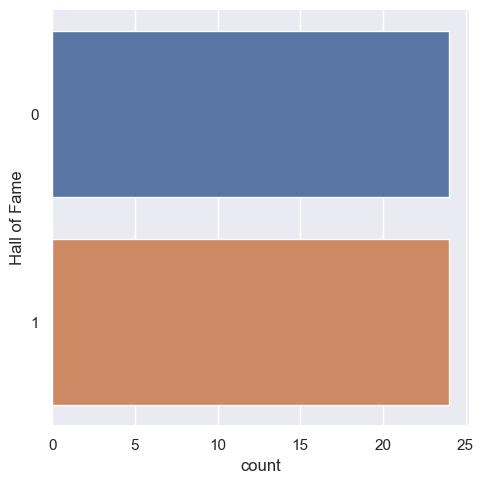

In [26]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')
X_US, y_US = undersample.fit_resample(dfX, dfy)

f = plt.figure(figsize=(16, 8))
sb.catplot(y = "Hall of Fame", data = y_US, kind = "count")

In [27]:
# New dataset will be balanced with same number of Hall of Fame = 1 and Hall of Fame = 0
data_US = pd.concat([X_US, y_US], axis=1)
data_US.head()

index  Year Drafted    GP   MIN   PTS  FGM   FGA   FG%  3P Made  3PA  ...  \
0    642          1994  79.0  33.8  11.7  4.2  10.8  38.5      0.9  3.3  ...   
1    546          1992  44.0   6.4   2.4  1.0   1.9  53.7      0.0  0.0  ...   
2    822          1999  53.0   7.4   2.0  0.8   1.8  43.9      0.0  0.0  ...   
3    657          1995  76.0  30.0  13.4  5.6  11.6  48.5      0.0  0.1  ...   
4    940          2002  53.0   6.3   2.4  1.1   2.2  50.0      0.1  0.2  ...   

    FT%  OREB  DREB  REB  AST  STL  BLK  TOV   EFF  Hall of Fame  
0  69.8   1.9   3.5  5.4  7.7  1.9  0.3  3.2  16.1             0  
1  50.0   0.4   1.0  1.4  0.2  0.2  0.4  0.6   2.7             0  
2  59.5   0.3   0.6  1.0  0.9  0.4  0.0  0.8   2.1             0  
3  68.3   3.0   4.5  7.5  1.0  0.7  1.5  2.0  15.1             0  
4  35.0   0.3   0.7  1.0  0.2  0.3  0.0  0.4   2.2             0  

[5 rows x 23 columns]

In [28]:
#check count
print(data_US.groupby('Hall of Fame').size())

Hall of Fame
0    24
1    24
dtype: int64


Disadvantage: The deletion of observations in this random manner may lead to the deletion of some very useful information from the dataset

## Oversampling
### Random over-sampling is a technique that randomly samples a number of observations from the minority class (sampling is done with replacement) and adds them to the dataset.

<Figure size 1600x800 with 0 Axes>

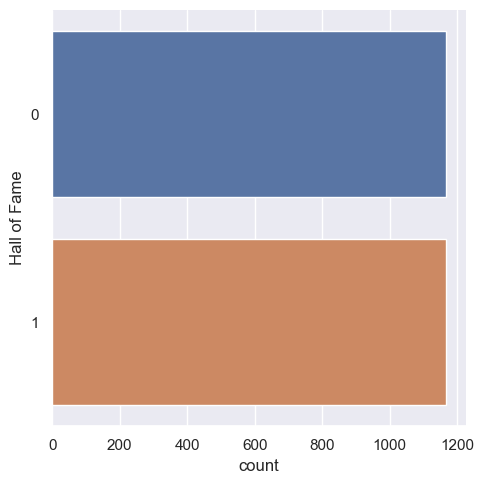

In [29]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
X_OS, y_OS = oversample.fit_resample(dfX, dfy)

f = plt.figure(figsize=(16, 8))
sb.catplot(y = "Hall of Fame", data = y_OS, kind = "count")

In [30]:
#new dataset will be balanced with same number of isfraud=1 and isfraud=0
data_OS = pd.concat([X_OS, y_OS], axis=1)
data_OS.head()

index  Year Drafted    GP   MIN   PTS  FGM   FGA   FG%  3P Made  3PA  ...  \
0     11          1980  75.0  23.6  12.9  5.3  10.7  49.5      0.1  0.4  ...   
1     12          1980  74.0  17.0   5.4  1.9   3.9  47.8      0.0  0.1  ...   
2     13          1980  81.0  30.4   9.8  4.2   8.3  50.3      0.0  0.0  ...   
3     14          1980  59.0  10.1   3.2  1.4   3.1  45.4      0.0  0.1  ...   
4     15          1980  54.0  12.4   5.6  2.1   4.6  46.2      0.1  0.2  ...   

    FT%  OREB  DREB  REB  AST  STL  BLK  TOV   EFF  Hall of Fame  
0  71.2   0.4   1.5  1.9  3.6  0.8  0.1  2.9  10.2             0  
1  79.3   0.9   1.2  2.1  1.5  0.8  0.3  1.1   6.4             0  
2  76.5   3.3   5.3  8.6  2.7  0.7  1.0  1.6  16.5             0  
3  56.4   0.5   0.6  1.0  1.2  0.6  0.1  1.3   2.8             0  
4  73.7   0.6   0.6  1.2  1.0  0.4  0.0  0.9   4.3             0  

[5 rows x 23 columns]

In [31]:
#check count
print(data_OS.groupby('Hall of Fame').size())

Hall of Fame
0    1167
1    1167
dtype: int64


Disadvantage: This technique may increase the chance of model overfitting.

## SMOTE
### SMOTE is a technique that generates new observations by interpolating between observations in the original dataset. Implementing SMOTE on our imbalanced dataset helped us with the imbalance of our labels.

<Figure size 1600x800 with 0 Axes>

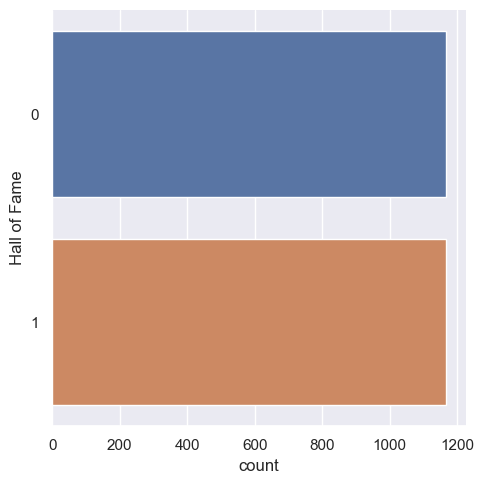

In [32]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_SM, y_SM = smote.fit_resample(dfX, dfy)

f = plt.figure(figsize=(16, 8))
sb.catplot(y = "Hall of Fame", data = y_SM, kind = "count")

In [33]:
#new dataset will be balanced with same number of Hall of Fame = True and Hall of Fame = False
data_SM = pd.concat([X_SM, y_SM], axis=1)
data_SM.head()

index  Year Drafted    GP   MIN   PTS  FGM   FGA   FG%  3P Made  3PA  ...  \
0     11          1980  75.0  23.6  12.9  5.3  10.7  49.5      0.1  0.4  ...   
1     12          1980  74.0  17.0   5.4  1.9   3.9  47.8      0.0  0.1  ...   
2     13          1980  81.0  30.4   9.8  4.2   8.3  50.3      0.0  0.0  ...   
3     14          1980  59.0  10.1   3.2  1.4   3.1  45.4      0.0  0.1  ...   
4     15          1980  54.0  12.4   5.6  2.1   4.6  46.2      0.1  0.2  ...   

    FT%  OREB  DREB  REB  AST  STL  BLK  TOV   EFF  Hall of Fame  
0  71.2   0.4   1.5  1.9  3.6  0.8  0.1  2.9  10.2             0  
1  79.3   0.9   1.2  2.1  1.5  0.8  0.3  1.1   6.4             0  
2  76.5   3.3   5.3  8.6  2.7  0.7  1.0  1.6  16.5             0  
3  56.4   0.5   0.6  1.0  1.2  0.6  0.1  1.3   2.8             0  
4  73.7   0.6   0.6  1.2  1.0  0.4  0.0  0.9   4.3             0  

[5 rows x 23 columns]

In [34]:
#check count
print(data_SM.groupby('Hall of Fame').size())

Hall of Fame
0    1167
1    1167
dtype: int64


### We will decide which method to adopt by looking at the correlation between Hall of Fame and EFF after each method through a scatterplot graph.

index  Year Drafted        GP       MIN       PTS       FGM  \
index         1.000000      0.999508 -0.440695 -0.320446 -0.341180 -0.376414   
Year Drafted  0.999508      1.000000 -0.441586 -0.319794 -0.341264 -0.376127   
GP           -0.440695     -0.441586  1.000000  0.673336  0.652572  0.662557   
MIN          -0.320446     -0.319794  0.673336  1.000000  0.936973  0.934317   
PTS          -0.341180     -0.341264  0.652572  0.936973  1.000000  0.990995   
FGM          -0.376414     -0.376127  0.662557  0.934317  0.990995  1.000000   
FGA          -0.343504     -0.342798  0.639329  0.952757  0.982276  0.982986   
FG%          -0.308303     -0.308327  0.368571  0.198262  0.321866  0.361244   
3P Made       0.302258      0.302619  0.067756  0.202689  0.164550  0.109881   
3PA           0.290694      0.289870  0.062653  0.213786  0.165709  0.109812   
3P%           0.039678      0.036452 -0.004666 -0.071589 -0.069884 -0.100726   
FTM          -0.289637     -0.290733  0.572401  0.845437  0.933788  0.887107   
FTA          -0.314234     -0.316437  0.588336  0.872361  0.942678  0.908958   
FT%           0.067502      0.069797  0.224096  0.255656  0.243679  0.192113   
OREB         -0.251162     -0.249272  0.564691  0.749243  0.736231  0.768300   
DREB         -0.169366     -0.171876  0.538041  0.781085  0.795382  0.806877   
REB          -0.203843     -0.204915  0.563797  0.789776  0.794839  0.813795   
AST          -0.271331     -0.278553  0.319126  0.486287  0.388011  0.343520   
STL          -0.432464     -0.431144  0.390801  0.605141  0.576034  0.553616   
BLK          -0.152549     -0.154698  0.454751  0.603074  0.658929  0.656571   
TOV          -0.371115     -0.375579  0.599342  0.908752  0.877656  0.864093   
EFF          -0.328550     -0.330404  0.669358  0.917488  0.959596  0.952030   
Hall of Fame -0.557033     -0.556452  0.694267  0.588996  0.639813  0.645806   

                   FGA       FG%   3P Made       3PA  ...       FT%      OREB  \
index        -0.343504 -0.308303  0.302258  0.290694  ...  0.067502 -0.251162   
Year Drafted -0.342798 -0.308327  0.302619  0.289870  ...  0.069797 -0.249272   
GP            0.639329  0.368571  0.067756  0.062653  ...  0.224096  0.564691   
MIN           0.952757  0.198262  0.202689  0.213786  ...  0.255656  0.749243   
PTS           0.982276  0.321866  0.164550  0.165709  ...  0.243679  0.736231   
FGM           0.982986  0.361244  0.109881  0.109812  ...  0.192113  0.768300   
FGA           1.000000  0.219531  0.228114  0.233982  ...  0.240892  0.699026   
FG%           0.219531  1.000000 -0.372846 -0.402026  ... -0.164105  0.479186   
3P Made       0.228114 -0.372846  1.000000  0.992551  ...  0.287492 -0.202477   
3PA           0.233982 -0.402026  0.992551  1.000000  ...  0.298323 -0.211420   
3P%          -0.043123 -0.247837  0.452835  0.452396  ...  0.209669 -0.403385   
FTM           0.873973  0.286035  0.075441  0.081710  ...  0.301671  0.658077   
FTA           0.887759  0.326694  0.044955  0.049275  ...  0.168965  0.737585   
FT%           0.240892 -0.164105  0.287492  0.298323  ...  1.000000 -0.062039   
OREB          0.699026  0.479186 -0.202477 -0.211420  ... -0.062039  1.000000   
DREB          0.742298  0.437879 -0.093951 -0.110662  ... -0.002790  0.884973   
REB           0.745278  0.465845 -0.136001 -0.150615  ... -0.025610  0.948785   
AST           0.442521 -0.270511  0.344485  0.410217  ...  0.273888 -0.040126   
STL           0.610385 -0.062080  0.214696  0.275185  ...  0.167947  0.186663   
BLK           0.571568  0.464071 -0.188121 -0.210685  ... -0.017809  0.834954   
TOV           0.890302  0.141699  0.199647  0.221987  ...  0.138488  0.625160   
EFF           0.912950  0.410886  0.020398  0.025068  ...  0.183449  0.834458   
Hall of Fame  0.599449  0.439722 -0.040040 -0.049700  ...  0.111059  0.486281   

                  DREB       REB       AST       STL       BLK       TOV  \
index        -0.169366 -0.203843 -0.271331 -0.432464 -0.152549 -0.371115   

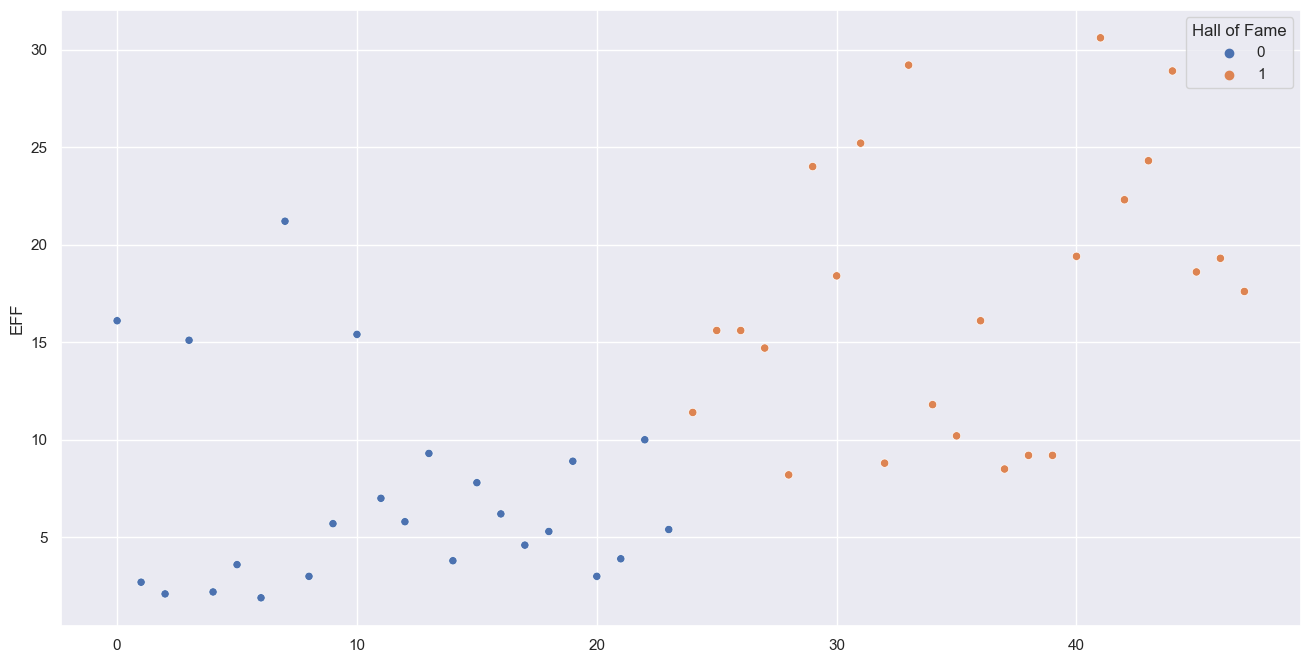

In [35]:
f = plt.figure(figsize=(16, 8))
sb.scatterplot(data=data_US, x=data_US.index, y='EFF', hue='Hall of Fame')
data_US.corr()

Correlation between **EFF** and **Hall of Fame** = **0.651**

index  Year Drafted        GP       MIN       PTS       FGM  \
index         1.000000      0.999224 -0.417647 -0.248244 -0.297345 -0.334898   
Year Drafted  0.999224      1.000000 -0.417169 -0.250369 -0.300006 -0.337777   
GP           -0.417647     -0.417169  1.000000  0.636615  0.573180  0.587713   
MIN          -0.248244     -0.250369  0.636615  1.000000  0.934622  0.928815   
PTS          -0.297345     -0.300006  0.573180  0.934622  1.000000  0.991368   
FGM          -0.334898     -0.337777  0.587713  0.928815  0.991368  1.000000   
FGA          -0.298947     -0.301424  0.560791  0.939152  0.981229  0.982356   
FG%          -0.342522     -0.343220  0.489060  0.408415  0.462244  0.496443   
3P Made       0.337293      0.336993 -0.002577  0.179448  0.129977  0.085520   
3PA           0.331215      0.330949 -0.014093  0.186124  0.138218  0.092659   
3P%           0.217047      0.216416  0.034800  0.007345 -0.022304 -0.038913   
FTM          -0.241413     -0.243155  0.496299  0.853641  0.933987  0.886967   
FTA          -0.261118     -0.264170  0.514002  0.879085  0.943664  0.909437   
FT%           0.061289      0.064066  0.100844  0.122965  0.144922  0.091087   
OREB         -0.251425     -0.253068  0.492121  0.708008  0.714173  0.737534   
DREB         -0.120827     -0.125719  0.468023  0.743359  0.756150  0.763404   
REB          -0.169422     -0.173323  0.488770  0.750158  0.760775  0.773737   
AST          -0.230487     -0.231114  0.360767  0.535219  0.464643  0.431868   
STL          -0.358782     -0.355034  0.454032  0.645320  0.630163  0.612873   
BLK          -0.119083     -0.122679  0.367658  0.587912  0.627170  0.621998   
TOV          -0.332624     -0.336027  0.572167  0.902109  0.897651  0.891674   
EFF          -0.280115     -0.282962  0.598892  0.911538  0.955312  0.947207   
Hall of Fame -0.475410     -0.473049  0.599120  0.618300  0.662651  0.666864   

                   FGA       FG%   3P Made       3PA  ...       FT%      OREB  \
index        -0.298947 -0.342522  0.337293  0.331215  ...  0.061289 -0.251425   
Year Drafted -0.301424 -0.343220  0.336993  0.330949  ...  0.064066 -0.253068   
GP            0.560791  0.489060 -0.002577 -0.014093  ...  0.100844  0.492121   
MIN           0.939152  0.408415  0.179448  0.186124  ...  0.122965  0.708008   
PTS           0.981229  0.462244  0.129977  0.138218  ...  0.144922  0.714173   
FGM           0.982356  0.496443  0.085520  0.092659  ...  0.091087  0.737534   
FGA           1.000000  0.361963  0.200076  0.213956  ...  0.135616  0.654178   
FG%           0.361963  1.000000 -0.318433 -0.348922  ... -0.137520  0.615183   
3P Made       0.200076 -0.318433  1.000000  0.990482  ...  0.239531 -0.240030   
3PA           0.213956 -0.348922  0.990482  1.000000  ...  0.247451 -0.256110   
3P%           0.028549 -0.276257  0.487207  0.478489  ...  0.414216 -0.337788   
FTM           0.873909  0.405338  0.037646  0.049753  ...  0.235120  0.655511   
FTA           0.887367  0.446485  0.009292  0.017630  ...  0.082638  0.738892   
FT%           0.135616 -0.137520  0.239531  0.247451  ...  1.000000 -0.201875   
OREB          0.654178  0.615183 -0.240030 -0.256110  ... -0.201875  1.000000   
DREB          0.688546  0.561481 -0.164301 -0.181753  ... -0.147590  0.886368   
REB           0.693431  0.597117 -0.195767 -0.213305  ... -0.171746  0.948586   
AST           0.522762 -0.081657  0.370689  0.403897  ...  0.246593 -0.063947   
STL           0.659906  0.147715  0.227130  0.265505  ...  0.161311  0.200153   
BLK           0.537183  0.509268 -0.252144 -0.272009  ... -0.131221  0.839224   
TOV           0.905447  0.352085  0.132100  0.144724  ...  0.009916  0.626244   
EFF           0.899838  0.573634 -0.018507 -0.019607  ...  0.071073  0.826798   
Hall of Fame  0.623849  0.510874 -0.076596 -0.078804  ...  0.041441  0.537948   

                  DREB       REB       AST       STL       BLK       TOV  \
index        -0.120827 -0.169422 -0.230487 -0.358782 -0.119083 -0.332624   

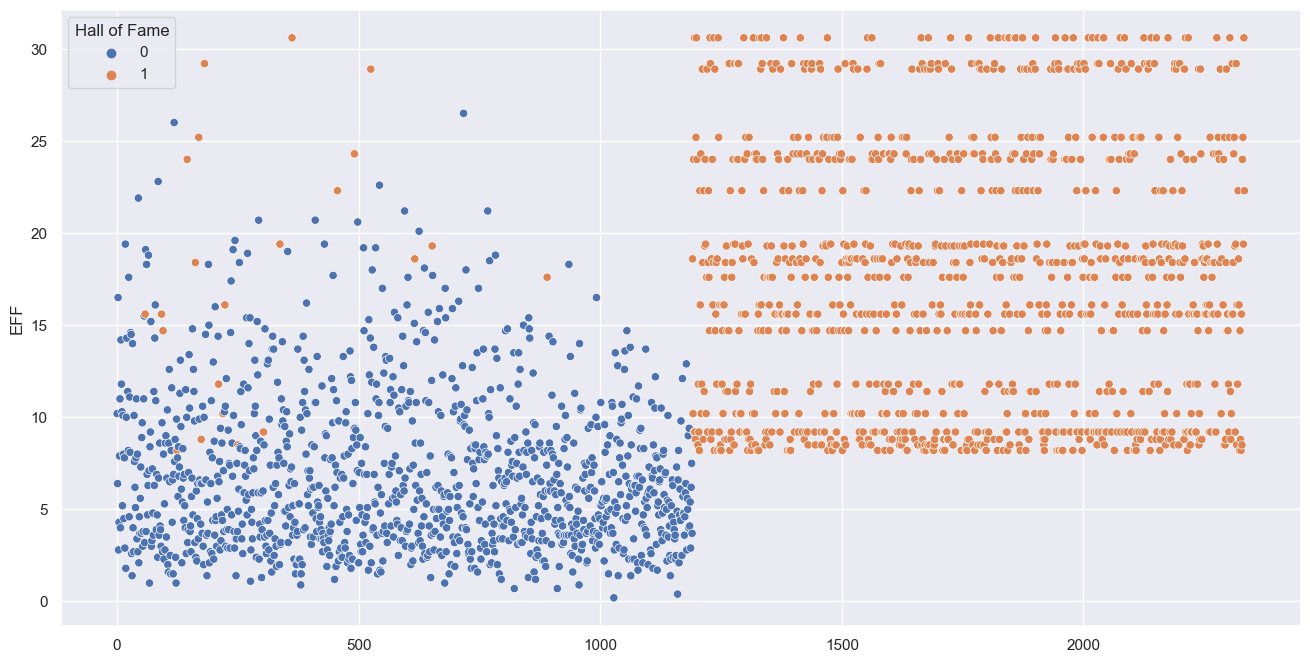

In [36]:
f = plt.figure(figsize=(16, 8))
sb.scatterplot(data=data_OS, x=data_OS.index, y='EFF', hue='Hall of Fame')
data_OS.corr()

Correlation between **EFF** and **Hall of Fame** = **0.675**

index  Year Drafted        GP       MIN       PTS       FGM  \
index         1.000000      0.998790 -0.443665 -0.278065 -0.331413 -0.366224   
Year Drafted  0.998790      1.000000 -0.450693 -0.290648 -0.345054 -0.379444   
GP           -0.443665     -0.450693  1.000000  0.673714  0.615988  0.629073   
MIN          -0.278065     -0.290648  0.673714  1.000000  0.938917  0.934846   
PTS          -0.331413     -0.345054  0.615988  0.938917  1.000000  0.992703   
FGM          -0.366224     -0.379444  0.629073  0.934846  0.992703  1.000000   
FGA          -0.331219     -0.344200  0.609052  0.943881  0.983181  0.985949   
FG%          -0.372333     -0.379269  0.514322  0.464072  0.513997  0.540158   
3P Made       0.383358      0.379400 -0.013837  0.157305  0.099480  0.060942   
3PA           0.381132      0.377416 -0.024034  0.163012  0.106117  0.067027   
3P%           0.211330      0.208783  0.008722 -0.002657 -0.027550 -0.042850   
FTM          -0.286418     -0.299575  0.545922  0.865248  0.943608  0.903449   
FTA          -0.299066     -0.313532  0.558780  0.884206  0.949365  0.919160   
FT%           0.039596      0.040806  0.124217  0.144104  0.162663  0.117719   
OREB         -0.279069     -0.289441  0.524148  0.745527  0.751946  0.767271   
DREB         -0.158091     -0.172569  0.501837  0.784762  0.793227  0.793075   
REB          -0.203740     -0.217133  0.520681  0.787934  0.795723  0.800860   
AST          -0.287859     -0.293795  0.432712  0.562662  0.500928  0.480108   
STL          -0.400659     -0.403648  0.528233  0.682885  0.667690  0.660075   
BLK          -0.141936     -0.154530  0.397166  0.631833  0.665355  0.654536   
TOV          -0.373625     -0.388126  0.624934  0.913099  0.915579  0.911507   
EFF          -0.318653     -0.332234  0.634178  0.923818  0.962736  0.953935   
Hall of Fame -0.499398     -0.512984  0.609378  0.654130  0.708789  0.711255   

                   FGA       FG%   3P Made       3PA  ...       FT%      OREB  \
index        -0.331219 -0.372333  0.383358  0.381132  ...  0.039596 -0.279069   
Year Drafted -0.344200 -0.379269  0.379400  0.377416  ...  0.040806 -0.289441   
GP            0.609052  0.514322 -0.013837 -0.024034  ...  0.124217  0.524148   
MIN           0.943881  0.464072  0.157305  0.163012  ...  0.144104  0.745527   
PTS           0.983181  0.513997  0.099480  0.106117  ...  0.162663  0.751946   
FGM           0.985949  0.540158  0.060942  0.067027  ...  0.117719  0.767271   
FGA           1.000000  0.426667  0.162078  0.175174  ...  0.159180  0.698603   
FG%           0.426667  1.000000 -0.313101 -0.348210  ... -0.120466  0.630802   
3P Made       0.162078 -0.313101  1.000000  0.988541  ...  0.254291 -0.224458   
3PA           0.175174 -0.348210  0.988541  1.000000  ...  0.264475 -0.241655   
3P%           0.024372 -0.303118  0.524734  0.519996  ...  0.394292 -0.332311   
FTM           0.887248  0.472257  0.011174  0.020457  ...  0.229309  0.709672   
FTA           0.895272  0.509555 -0.017985 -0.012703  ...  0.095989  0.783209   
FT%           0.159180 -0.120466  0.254291  0.264475  ...  1.000000 -0.173792   
OREB          0.698603  0.630802 -0.224458 -0.241655  ... -0.173792  1.000000   
DREB          0.734909  0.572587 -0.119211 -0.136207  ... -0.113590  0.905922   
REB           0.737434  0.606856 -0.158799 -0.176291  ... -0.137837  0.957979   
AST           0.548163  0.027352  0.294370  0.329888  ...  0.285975  0.026397   
STL           0.690386  0.250539  0.142644  0.180758  ...  0.195146  0.296081   
BLK           0.586308  0.517922 -0.201657 -0.222998  ... -0.124664  0.846440   
TOV           0.917436  0.431426  0.084059  0.095672  ...  0.056609  0.688265   
EFF           0.915134  0.603651 -0.021492 -0.023427  ...  0.093038  0.848296   
Hall of Fame  0.670272  0.542195 -0.119926 -0.123603  ...  0.036862  0.589956   

                  DREB       REB       AST       STL       BLK       TOV  \
index        -0.158091 -0.203740 -0.287859 -0.400659 -0.141936 -0.373625   

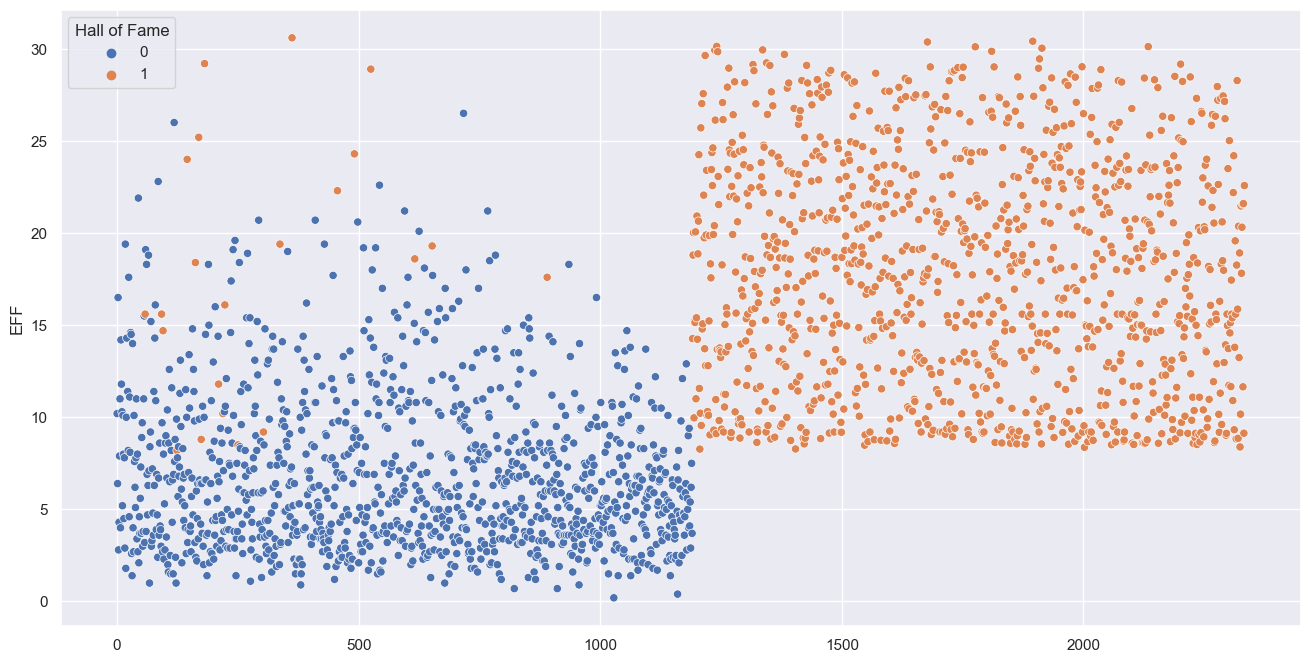

In [37]:
f = plt.figure(figsize=(16, 8))
sb.scatterplot(data=data_SM, x=data_SM.index, y='EFF', hue='Hall of Fame')
data_SM.corr()

Correlation between **EFF** and **Hall of Fame** = **0.718**

Considering the disadvantages of Undersampling and Oversampling, **SMOTE** will be the best way to balance our dataset, furthermore, **SMOTE** has the highest correlation between **EFF** and **Hall of Fame** among the 3 methods.

## Model Building

We will look into 4 classification machine learning models to see which is the best in helping us predict which rookie end up in the NBA hall of fame.

The 4 models we will be using are: **Logistic Regression**, **Random Forest Classifier**, **K-Nearest Neighbour** and **XGBoost**

In [38]:
#Combine the SM data and split again
data_SM = pd.concat([X_SM, y_SM],axis=1)

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_SM,y_SM,test_size=0.2,random_state=12345)

In [40]:
## Assuming the positive are N and negative are Y 
## Function to get TPR(True Positive Rate) and FPR(False Positive Rate)
def get_TPR(actual, prediction):
    TP = confusion_matrix(actual, prediction)[1][1]
    FN = confusion_matrix(actual, prediction)[1][0]
    TPR = (TP/(TP+FN))
    
    return TPR
    
def get_FPR(actual, prediction):
    FP = confusion_matrix(actual, prediction)[0][1]
    TN = confusion_matrix(actual, prediction)[0][0]
    FPR = (FP/(FP+TN))
    
    return FPR

## Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
logR = LogisticRegression(max_iter=5000)
logR.fit(X_train,y_train.values.ravel())

logR_train_pred=logR.predict(X_train)
logR_test_pred=logR.predict(X_test)

Logistic Regression Confusion Matrix (Train)
Classification Accuracy:  0.9496518478843063
TPR:  0.9810526315789474
FPR:  0.08287895310796074


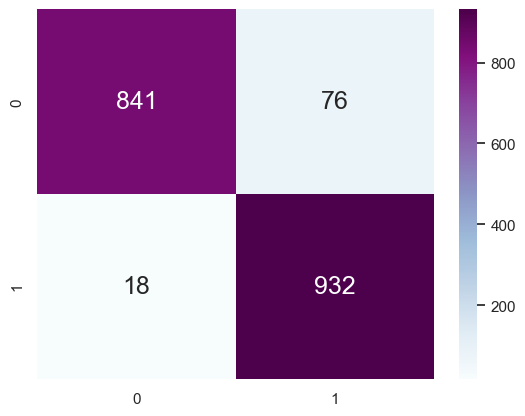

In [42]:
from sklearn.metrics import confusion_matrix
print("Logistic Regression Confusion Matrix (Train)")
sb.heatmap(confusion_matrix(y_train, logR_train_pred), 
           annot=True, fmt='.0f', annot_kws={"size":18}, cmap='BuPu')

print("Classification Accuracy: ", logR.score(X_train, y_train))
print('TPR: ', get_TPR(y_train, logR_train_pred))
print('FPR: ', get_FPR(y_train, logR_train_pred))

Logistic Regression Confusion Matrix (Test)
Classification Accuracy:  0.9528907922912205
TPR:  0.9907834101382489
FPR:  0.08


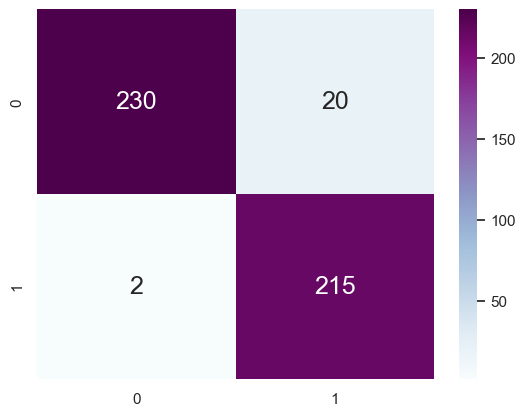

In [43]:
print("Logistic Regression Confusion Matrix (Test)")
sb.heatmap(confusion_matrix(y_test, logR_test_pred), 
           annot=True, fmt='.0f', annot_kws={"size":18}, cmap='BuPu')

print("Classification Accuracy: ", logR.score(X_test, y_test))
print('TPR: ', get_TPR(y_test, logR_test_pred))
print('FPR: ', get_FPR(y_test, logR_test_pred))

In [44]:
# F1 Score
from sklearn.metrics import f1_score
print('Logistic Regression TRAIN F1 Score: {}'.format(f1_score(y_train,logR_train_pred)))
print('Logistic Regression TEST F1 Score: {}'.format(f1_score(y_test,logR_test_pred)))

Logistic Regression TRAIN F1 Score: 0.9519918283963228
Logistic Regression TEST F1 Score: 0.9513274336283185


## Random Forest Classifier

In [45]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=4)
rfc.fit(X_train,y_train.values.ravel())

rfc_train_pred = rfc.predict(X_train)
rfc_test_pred = rfc.predict(X_test)

Random Forest Classifier Confusion Matrix (Train)
Classification Accuracy:  0.9480449919657205
TPR:  1.0
FPR:  0.10577971646673937


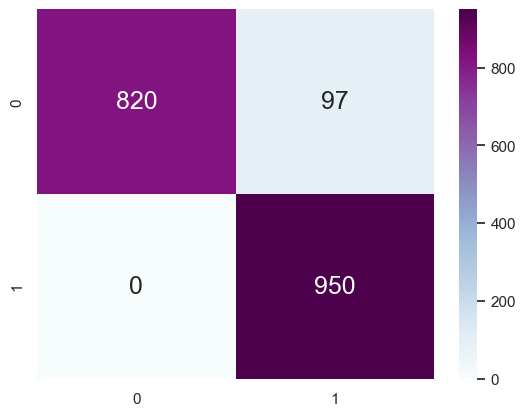

In [46]:
print("Random Forest Classifier Confusion Matrix (Train)")
sb.heatmap(confusion_matrix(y_train, rfc_train_pred), 
           annot=True, fmt='.0f', annot_kws={"size":18}, cmap='BuPu')

print("Classification Accuracy: ", rfc.score(X_train, y_train))
print('TPR: ', get_TPR(y_train, rfc_train_pred))
print('FPR: ', get_FPR(y_train, rfc_train_pred))

Random Forest Classifier Confusion Matrix (Test)
Classification Accuracy:  0.9635974304068522
TPR:  0.9953917050691244
FPR:  0.064


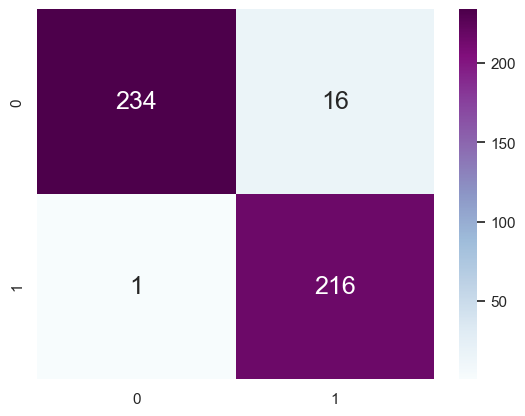

In [47]:
print("Random Forest Classifier Confusion Matrix (Test)")
sb.heatmap(confusion_matrix(y_test, rfc_test_pred), 
           annot=True, fmt='.0f', annot_kws={"size":18}, cmap='BuPu')

print("Classification Accuracy: ", rfc.score(X_test, y_test))
print('TPR: ', get_TPR(y_test, rfc_test_pred))
print('FPR: ', get_FPR(y_test, rfc_test_pred))

In [48]:
# F1 Score
print('Random Forest Classifier TRAIN F1 Score: {}'.format(f1_score(y_train,rfc_train_pred)))
print('Random Forest Classifier TEST F1 Score: {}'.format(f1_score(y_test,rfc_test_pred)))

Random Forest Classifier TRAIN F1 Score: 0.9514271407110666
Random Forest Classifier TEST F1 Score: 0.9621380846325167


## K-Nearest Neighbour

In [49]:
from sklearn.neighbors import KNeighborsClassifier
n=2
knn=KNeighborsClassifier(n_neighbors=n)
knn.fit(X_train, y_train.values.ravel())

knn_train_pred = knn.predict(X_train)
knn_test_pred = knn.predict(X_test)

K-Nearest Neighbors Confusion Matrix (Train)
Classification Accuracy:  0.9978575254418853
TPR:  0.9957894736842106
FPR:  0.0


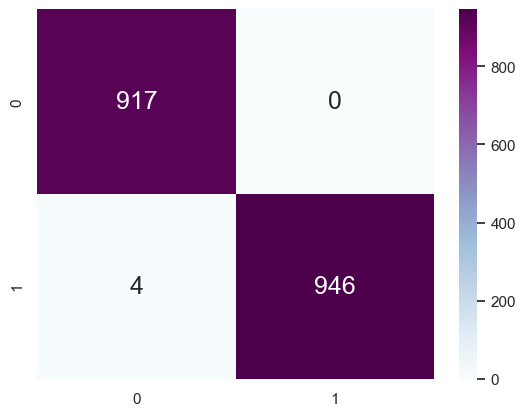

In [50]:
print("K-Nearest Neighbors Confusion Matrix (Train)")
sb.heatmap(confusion_matrix(y_train, knn_train_pred), 
           annot=True, fmt='.0f', annot_kws={"size":18}, cmap='BuPu')

print("Classification Accuracy: ", knn.score(X_train, y_train))
print('TPR: ', get_TPR(y_train, knn_train_pred))
print('FPR: ', get_FPR(y_train, knn_train_pred))

K-Nearest Neighbors Confusion Matrix (Test)
Classification Accuracy:  0.9828693790149893
TPR:  0.9953917050691244
FPR:  0.028


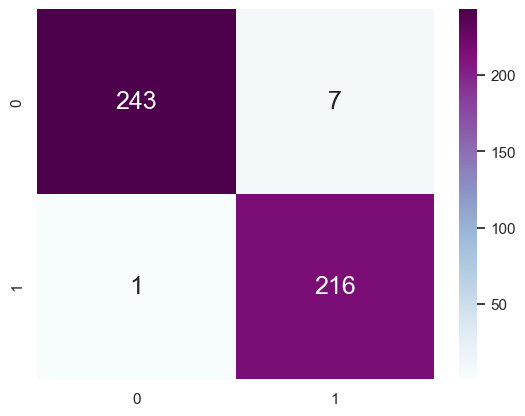

In [51]:
print("K-Nearest Neighbors Confusion Matrix (Test)")
sb.heatmap(confusion_matrix(y_test, knn_test_pred), 
           annot=True, fmt='.0f', annot_kws={"size":18}, cmap='BuPu')

print("Classification Accuracy: ", knn.score(X_test, y_test))
print('TPR: ', get_TPR(y_test, knn_test_pred))
print('FPR: ', get_FPR(y_test, knn_test_pred))

In [52]:
# F1 Score
print('K-Nearest Neighbors TRAIN F1 Score: {}'.format(f1_score(y_train,knn_train_pred)))
print('K-Nearest Neighbors TEST F1 Score: {}'.format(f1_score(y_test,knn_test_pred)))

K-Nearest Neighbors TRAIN F1 Score: 0.9978902953586498
K-Nearest Neighbors TEST F1 Score: 0.9818181818181819


## XGBoost

Unlike random forest which uses the technique of bagging, XGBoost uses the techniqueboosting. Boosting involves using trees with fewer splits. Boosting uses an ensemble technique which involves the following steps:

- An initial model F0 is defined to predict the target variable y. This model will be associated with a residual (y – F0)
- A new model h1 is fit to the residuals from the previous step
- Now, F0 and h1 are combined to give F1, the boosted version of F0. The mean squared error from F1 will be lower than that from F0

Reference: https://www.analyticsvidhya.com/blog/2018/09/an-end-to-end-guide-to-understand-the-math-behind-xgboost/

In [53]:
import xgboost as xgb
from xgboost import XGBClassifier

In [54]:
xgbc = XGBClassifier(
         eval_metric='aucpr')
xgbc.fit(X_train, y_train)

xgbc_train_pred = xgbc.predict(X_train)
xgbc_test_pred = xgbc.predict(X_test)

XGBoost Classifier Confusion Matrix (Train)
Classification Accuracy:  1.0
TPR:  1.0
FPR:  0.0


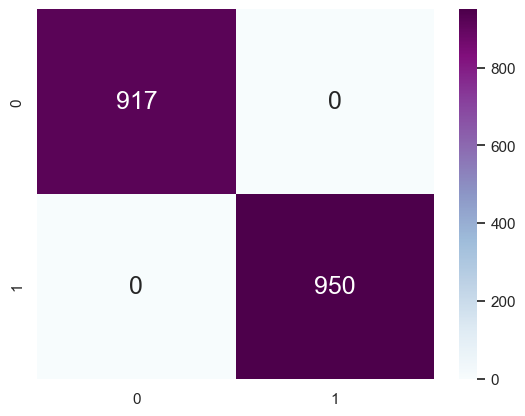

In [55]:
print("XGBoost Classifier Confusion Matrix (Train)")
sb.heatmap(confusion_matrix(y_train, xgbc_train_pred), 
           annot=True, fmt='.0f', annot_kws={"size":18}, cmap='BuPu')

print("Classification Accuracy: ", xgbc.score(X_train, y_train))
print('TPR: ', get_TPR(y_train, xgbc_train_pred))
print('FPR: ', get_FPR(y_train, xgbc_train_pred))

XGBoost Classifier Confusion Matrix (Test)
Classification Accuracy:  0.987152034261242
TPR:  0.9953917050691244
FPR:  0.02


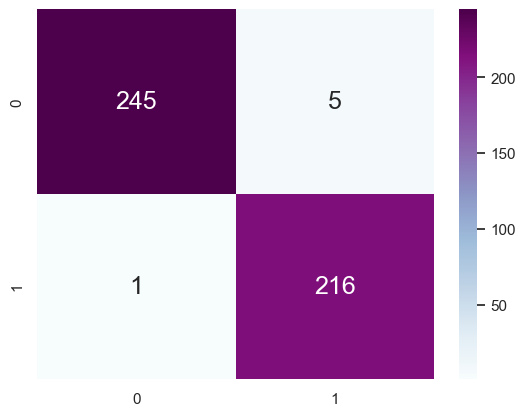

In [56]:
print("XGBoost Classifier Confusion Matrix (Test)")
sb.heatmap(confusion_matrix(y_test, xgbc_test_pred), 
           annot=True, fmt='.0f', annot_kws={"size":18}, cmap='BuPu')

print("Classification Accuracy: ", xgbc.score(X_test, y_test))
print('TPR: ', get_TPR(y_test, xgbc_test_pred))
print('FPR: ', get_FPR(y_test, xgbc_test_pred))

In [57]:
# F1 Score
print('XGBoost TRAIN F1 Score: {}'.format(f1_score(y_train,xgbc_train_pred)))
print('XGBoost TEST F1 Score: {}'.format(f1_score(y_test,xgbc_test_pred)))

XGBoost TRAIN F1 Score: 1.0
XGBoost TEST F1 Score: 0.9863013698630136


## Analysis

Based on the 4 models that we have used, we determine which model is the most effective by looking at these few indicators:
1) **Classification Accuracy**
 - Describes the overall performance of the classification model based on FN,TN,FP,TP
 
2) **True Positive Rate (TPR)**
 - TPR = TP/(TP + FN)
 
3) **False Positive Rate (FPR)**
 - FPR = FP/(FP + TN)

4) **F1 Score**
 - A weighted harmonic mean of precision and recall
 - F1 = 2 * (Precision * Recall) / (Precision + Recall)
 
### Classification Accuracy
**XGBoost** has the highest classification accuracy for both the **train** (1) and **test** datasets (0.987)

### TPR
**XGBoost** has the highest TPR for both the **train** (1) and **test** datasets (0.991)

### FPR
**XGBoost** has the lowest FPR for both the **train** (0) and **test** datasets (0.016)

### F1 Score
**XGBoost** has the higher F1 Scores for both the **train** (1) and **test** datasets (0.986)

## Conclusion

Based on the various indicators, **XGBoost** is the best and most suitable machine learning model to determine if a player will make it into the NBA hall of fame based on their rookie statistics.

## Using the model on the dataset of non-retired players

We will now utilise the K-Nearest Neighbour machine learning model to predict which **non-retired player** will make it into the hall of fame based on their rookie statistics.

In [58]:
rookiedata_active.drop(['Hall of Fame', 'Retired'], axis=1, inplace=True)
rookiedata_active

index               Name  Year Drafted    GP   MIN   PTS  FGM   FGA  \
0      775      Dirk Nowitzki          1998  47.0  20.4   8.2  2.9   7.1   
1      801       Vince Carter          1998  50.0  35.2  18.3  6.9  15.3   
2      816        Jason Terry          1999  81.0  23.3   8.1  3.1   7.4   
3      851     Jamal Crawford          2000  61.0  17.2   4.6  1.8   5.0   
4      885        Joe Johnson          2001  77.0  24.9   7.5  3.3   7.6   
..     ...                ...           ...   ...   ...   ...  ...   ...   
266   1527      Pascal Siakam          2016  32.0  17.8   5.1  2.3   4.3   
267   1528      Patrick McCaw          2016  26.0  12.2   2.8  1.1   2.8   
268   1533   Tomas Satoransky          2016  23.0  14.7   3.1  1.3   3.2   
269   1534      Troy Williams          2016  24.0  17.4   5.3  2.1   5.1   
270   1536  Willy Hernangomez          2016  28.0  13.6   5.5  2.3   4.1   

      FG%  3P Made  ...  FTA   FT%  OREB  DREB  REB  AST  STL  BLK  TOV   EFF  
0    40.5      0.3  ...  2.7  77.3   0.9   2.6  3.4  1.0  0.6  0.6  1.6   7.4  
1    45.0      0.4  ...  5.4  76.1   1.9   3.8  5.7  3.0  1.1  1.5  2.2  17.6  
2    41.5      0.6  ...  1.7  80.7   0.3   1.8  2.0  4.3  1.1  0.1  1.9   9.1  
3    35.2      0.7  ...  0.6  79.4   0.1   1.3  1.5  2.3  0.7  0.2  1.4   4.6  
4    43.0      0.5  ...  0.7  77.4   1.0   2.4  3.3  2.3  0.8  0.3  0.9   8.8  
..    ...      ...  ...  ...   ...   ...   ...  ...  ...  ...  ...  ...   ...  
266  52.5      0.0  ...  0.7  77.3   1.3   2.2  3.5  0.4  0.5  0.8  0.7   7.4  
267  38.9      0.6  ...  0.2  50.0   0.3   0.8  1.0  1.0  0.4  0.3  0.6   3.2  
268  39.7      0.1  ...  0.7  64.7   0.4   1.1  1.5  2.2  0.5  0.0  0.9   4.2  
269  41.8      0.4  ...  1.0  60.0   0.3   1.6  1.8  0.8  1.0  0.4  1.1   4.8  
270  56.0      0.1  ...  1.1  71.9   1.5   3.2  4.7  0.8  0.3  0.5  1.2   8.5  

[271 rows x 23 columns]

In [59]:
active_players = rookiedata_active[['Name']]
rookiedata_active1 = rookiedata_active.drop('Name', axis=1)
knn_active = xgbc.predict(rookiedata_active1)

In [60]:
for x, y in enumerate(knn_active):
    if y == 0:
        rookiedata_active1.drop([x], inplace=True)
        
rookiedata_active1

index  Year Drafted    GP   MIN   PTS  FGM   FGA   FG%  3P Made  3PA  \
5      890          2001  82.0  36.7  17.6  6.7  13.0  51.8      0.0  0.1   
15     967          2003  79.0  39.5  20.9  7.9  18.9  41.7      0.8  2.7   
21    1005          2004  82.0  32.6  12.0  4.3   8.3  52.0      0.0  0.0   
94    1238          2009  72.0  37.2  20.1  7.4  16.2  45.8      0.5  2.0   
98    1244          2010  82.0  38.0  22.5  8.5  16.8  50.6      0.1  0.3   
109   1261          2010  69.0  37.8  16.4  5.8  14.1  40.9      0.5  1.7   
131   1315          2011  51.0  30.5  18.5  6.9  14.6  46.9      1.4  3.6   
178   1400          2013  70.0  34.5  16.7  6.1  15.1  40.5      0.8  3.0   
227   1483          2015  82.0  32.0  18.3  7.6  14.1  54.2      0.4  1.1   
258   1519          2016  22.0  24.8  18.9  6.2  13.4  46.4      1.2  3.0   

     ...  FTA   FT%  OREB  DREB   REB  AST  STL  BLK  TOV   EFF  
5    ...  5.8  70.9   2.9   6.0   8.9  2.7  0.5  2.1  2.7  21.1  
15   ...  5.8  75.4   1.3   4.2   5.5  5.9  1.6  0.7  3.5  18.8  
21   ...  5.0  67.1   3.5   6.5  10.0  0.9  0.9  1.7  2.0  17.9  
94   ...  6.5  74.8   0.9   4.4   5.3  5.8  1.5  0.4  3.0  19.6  
98   ...  8.5  64.2   3.3   8.8  12.1  3.8  0.8  0.6  2.7  25.6  
109  ...  5.7  76.6   0.5   4.1   4.6  8.3  1.8  0.5  3.8  18.1  
131  ...  3.8  87.2   0.9   2.9   3.7  5.4  1.1  0.4  3.1  17.7  
178  ...  5.2  70.3   1.4   4.8   6.2  6.3  1.9  0.6  3.5  17.6  
227  ...  3.4  81.1   2.8   7.7  10.5  2.0  0.7  1.7  2.2  23.8  
258  ...  6.8  77.3   2.0   5.4   7.3  1.9  0.8  2.4  3.8  18.8  

[10 rows x 22 columns]

In [61]:
df1 = rookiedata_active1.join(active_players)
df1

index  Year Drafted    GP   MIN   PTS  FGM   FGA   FG%  3P Made  3PA  \
5      890          2001  82.0  36.7  17.6  6.7  13.0  51.8      0.0  0.1   
15     967          2003  79.0  39.5  20.9  7.9  18.9  41.7      0.8  2.7   
21    1005          2004  82.0  32.6  12.0  4.3   8.3  52.0      0.0  0.0   
94    1238          2009  72.0  37.2  20.1  7.4  16.2  45.8      0.5  2.0   
98    1244          2010  82.0  38.0  22.5  8.5  16.8  50.6      0.1  0.3   
109   1261          2010  69.0  37.8  16.4  5.8  14.1  40.9      0.5  1.7   
131   1315          2011  51.0  30.5  18.5  6.9  14.6  46.9      1.4  3.6   
178   1400          2013  70.0  34.5  16.7  6.1  15.1  40.5      0.8  3.0   
227   1483          2015  82.0  32.0  18.3  7.6  14.1  54.2      0.4  1.1   
258   1519          2016  22.0  24.8  18.9  6.2  13.4  46.4      1.2  3.0   

     ...   FT%  OREB  DREB   REB  AST  STL  BLK  TOV   EFF  \
5    ...  70.9   2.9   6.0   8.9  2.7  0.5  2.1  2.7  21.1   
15   ...  75.4   1.3   4.2   5.5  5.9  1.6  0.7  3.5  18.8   
21   ...  67.1   3.5   6.5  10.0  0.9  0.9  1.7  2.0  17.9   
94   ...  74.8   0.9   4.4   5.3  5.8  1.5  0.4  3.0  19.6   
98   ...  64.2   3.3   8.8  12.1  3.8  0.8  0.6  2.7  25.6   
109  ...  76.6   0.5   4.1   4.6  8.3  1.8  0.5  3.8  18.1   
131  ...  87.2   0.9   2.9   3.7  5.4  1.1  0.4  3.1  17.7   
178  ...  70.3   1.4   4.8   6.2  6.3  1.9  0.6  3.5  17.6   
227  ...  81.1   2.8   7.7  10.5  2.0  0.7  1.7  2.2  23.8   
258  ...  77.3   2.0   5.4   7.3  1.9  0.8  2.4  3.8  18.8   

                        Name  
5                  Pau Gasol  
15              LeBron James  
21             Dwight Howard  
94              Tyreke Evans  
98             Blake Griffin  
109                John Wall  
131             Kyrie Irving  
178  Michael Carter-Williams  
227       Karl-Anthony Towns  
258              Joel Embiid  

[10 rows x 23 columns]

**Using XGBoost machine learning model, we conclude that the following players are predicted to make it into the NBA hall of fame based on their rookie statistics:**

- Pau Gasol
- Lebron James
- Tyreke Evans
- Blake Griffin
- John Wall
- Kyrie Irving
- Michael Carter-Wlliams
- Karl-Anthony Towns
- Joel Embiid